# Projet de MLOps
## Statistiques descriptives  
Auteurs: Lilou Masson, Paul Hamann Cossart

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from preparation import data_cleaning, create_dfs

### Données initiales

Données du 1/1/2012 au 31/12/2025  

Consommation brute gaz totale : données à l'heure  
Consommation brute électrique totale : données à la demi-heure

Conso brute totale n'a pas de sens (addition d'un volume à l'heure et d'un volume à la demi-heure)  
on garde elec et gaz separement  

Pas de données elec pour décembre 2025  

Sinon, pas d'autres valeurs manquantes

In [2]:
df = pd.read_csv(
    'DATA/consommation-quotidienne-brute.csv',
    sep = ';'
)

In [3]:
print(df.shape)

(244728, 12)


In [4]:
df.head(5)

,Date - Heure,Date,Heure,Consommation brute gaz (MW PCS 0°C) - NaTran,Statut - NaTran,Consommation brute gaz (MW PCS 0°C) - Teréga,Statut - Teréga,Consommation brute gaz totale (MW PCS 0°C),Consommation brute électricité (MW) - RTE,Statut - RTE,Consommation brute totale (MW),flag_ignore
0,2025-12-31T22:00:00+00:00,31/12/2025,23:00,62510.0,Définitif,4352.0,Définitif,66862.0,NaN,NaN,NaN,non
1,2025-12-31T21:00:00+00:00,31/12/2025,22:00,66697.0,Définitif,4782.0,Définitif,71479.0,NaN,NaN,NaN,non
2,2025-12-31T20:00:00+00:00,31/12/2025,21:00,73103.0,Définitif,5113.0,Définitif,78216.0,NaN,NaN,NaN,non
3,2025-12-31T19:00:00+00:00,31/12/2025,20:00,77996.0,Définitif,5271.0,Définitif,83267.0,NaN,NaN,NaN,non
4,2025-12-31T18:00:00+00:00,31/12/2025,19:00,80381.0,Définitif,5495.0,Définitif,85876.0,NaN,NaN,NaN,non


In [5]:
doublons = df[df.duplicated(subset=['Date', 'Heure'], keep=False)]
doublons

,Date - Heure,Date,Heure,Consommation brute gaz (MW PCS 0°C) - NaTran,Statut - NaTran,Consommation brute gaz (MW PCS 0°C) - Teréga,Statut - Teréga,Consommation brute gaz totale (MW PCS 0°C),Consommation brute électricité (MW) - RTE,Statut - RTE,Consommation brute totale (MW),flag_ignore
35686,2023-12-03T23:00:00+00:00,04/12/2023,00:00,NaN,NaN,NaN,Définitif,NaN,61954.0,Consolidé,NaN,non
35687,2023-12-03T23:00:00+00:00,04/12/2023,00:00,59430.0,Meilleur Statut,3667.0,Définitif,63097.0,64171.0,Consolidé,127268.0,non
53206,2022-12-03T23:00:00+00:00,04/12/2022,00:00,NaN,Définitif,NaN,Définitif,NaN,57335.0,Définitif,NaN,non
53207,2022-12-03T23:00:00+00:00,04/12/2022,00:00,63371.0,Définitif,3680.0,Définitif,67051.0,59811.0,Définitif,126862.0,non
88198,2020-12-04T23:00:00+00:00,05/12/2020,00:00,68843.0,Définitif,4275.0,Définitif,73118.0,64891.0,Consolidé,138009.0,non
88199,2020-12-04T23:00:00+00:00,05/12/2020,00:00,72523.0,Définitif,4443.0,Définitif,76966.0,66352.0,Consolidé,143318.0,non


6 doublons sur la date et l'heure pour l'horaire 00:00

### Données transformées et nettoyées

In [6]:
df = data_cleaning(df)
df_gaz, df_ele = create_dfs(df)

In [9]:
df_gaz.head(5)

,dat,heu,heu_float,day,day_name,week,week_of_month,week_of_month_sin,week_of_month_cos,month,...,vac_de_noe,vac_d_hiv,vac_de_pri,vac_d_ete,vac_de_la_tou,top_fer,tmi,tma,tmo,con_bru_gaz_tot
0,2012-01-01,00:00:00,0.0,1,Sunday,52,1,0.951057,0.309017,1,...,1,0,0,0,0,1,NaN,NaN,NaN,55353.0
2,2012-01-01,01:00:00,1.0,1,Sunday,52,1,0.951057,0.309017,1,...,1,0,0,0,0,1,NaN,NaN,NaN,55444.0
4,2012-01-01,02:00:00,2.0,1,Sunday,52,1,0.951057,0.309017,1,...,1,0,0,0,0,1,NaN,NaN,NaN,55465.0
6,2012-01-01,03:00:00,3.0,1,Sunday,52,1,0.951057,0.309017,1,...,1,0,0,0,0,1,NaN,NaN,NaN,56048.0
8,2012-01-01,04:00:00,4.0,1,Sunday,52,1,0.951057,0.309017,1,...,1,0,0,0,0,1,NaN,NaN,NaN,57082.0


In [10]:
df_ele.head(5)

,dat,heu,heu_float,day,day_name,week,week_of_month,week_of_month_sin,week_of_month_cos,month,...,vac_de_noe,vac_d_hiv,vac_de_pri,vac_d_ete,vac_de_la_tou,top_fer,tmi,tma,tmo,con_bru_ele_rte
0,2012-01-01,00:00:00,0.0,1,Sunday,52,1,0.951057,0.309017,1,...,1,0,0,0,0,1,NaN,NaN,NaN,59610.0
1,2012-01-01,00:30:00,0.5,1,Sunday,52,1,0.951057,0.309017,1,...,1,0,0,0,0,1,NaN,NaN,NaN,58314.0
2,2012-01-01,01:00:00,1.0,1,Sunday,52,1,0.951057,0.309017,1,...,1,0,0,0,0,1,NaN,NaN,NaN,56230.0
3,2012-01-01,01:30:00,1.5,1,Sunday,52,1,0.951057,0.309017,1,...,1,0,0,0,0,1,NaN,NaN,NaN,56075.0
4,2012-01-01,02:00:00,2.0,1,Sunday,52,1,0.951057,0.309017,1,...,1,0,0,0,0,1,NaN,NaN,NaN,55531.0


### Analyse des saisonnalités

#### Evolution de la consommation de gaz et d'electricité

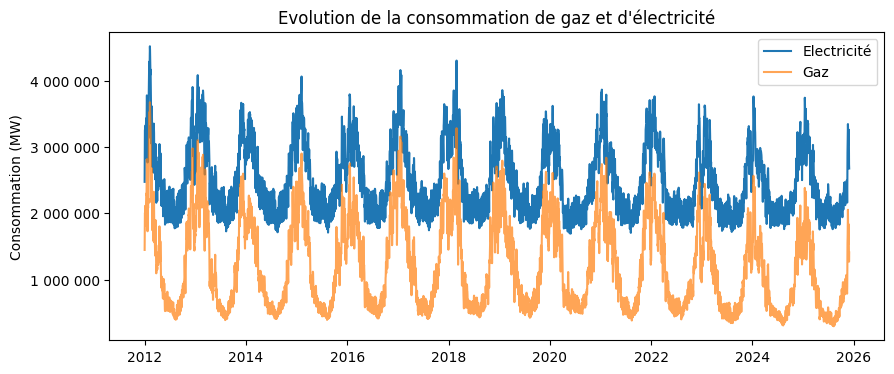

In [11]:
df_agg_gaz = (
    df_gaz
    .groupby(['dat'])
    .agg({'con_bru_gaz_tot': 'sum'})
    .reset_index()
)
df_agg_ele = (
    df_ele
    .groupby(['dat'])
    .agg({'con_bru_ele_rte': 'sum'})
    .reset_index()
)
plt.figure(figsize=(10, 4))
sns.lineplot(
    data=df_agg_ele, 
    x='dat', 
    y='con_bru_ele_rte',
    label='Electricité')
sns.lineplot(
    data=df_agg_gaz, 
    x='dat', 
    y='con_bru_gaz_tot',
    label='Gaz',
    alpha=0.7)

ax = plt.gca()
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f"{int(x):,}".replace(",", " "))
)

plt.title('Evolution de la consommation de gaz et d\'électricité')
plt.ylabel("Consommation (MW)")
plt.xlabel("")

plt.show()

Décroissance de la consommation de gaz et d'électricité au cours du temps

#### Consommation quotidienne de gaz et d'électricité en 2025

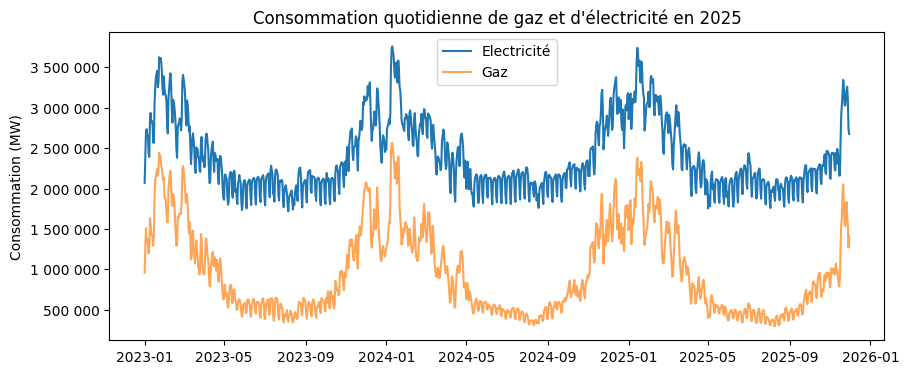

In [12]:
df_agg_gaz = (
    df_gaz
    .groupby(['dat', 'year'])
    .agg({'con_bru_gaz_tot': 'sum'})
    .reset_index()
)
df_agg_ele = (
    df_ele
    .groupby(['dat', 'year'])
    .agg({'con_bru_ele_rte': 'sum'})
    .reset_index()
)
plt.figure(figsize=(10, 4))
sns.lineplot(
    data=df_agg_ele.loc[df_agg_ele['year']>=2023], 
    x='dat', 
    y='con_bru_ele_rte',
    label='Electricité')
sns.lineplot(
    data=df_agg_gaz.loc[df_agg_gaz['year']>=2023], 
    x='dat', 
    y='con_bru_gaz_tot',
    label='Gaz',
    alpha=0.7)

ax = plt.gca()
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f"{int(x):,}".replace(",", " "))
)

plt.title('Consommation quotidienne de gaz et d\'électricité en 2025')
plt.ylabel("Consommation (MW)")
plt.xlabel("")

plt.show()

#### Consommation quotidienne par jour de la semaine

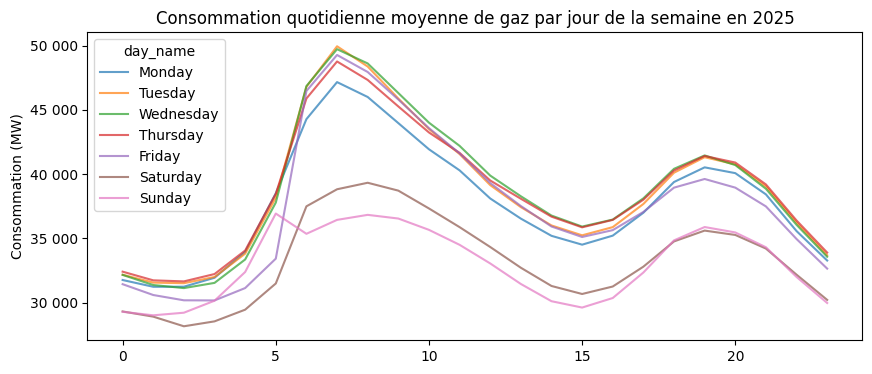

In [17]:
df_agg_gaz = (
    df_gaz
    .loc[df_gaz['year']==2025]
    .groupby(['day_name', 'heu_float'], observed = True)
    .agg({'con_bru_gaz_tot': 'mean'})
    .reset_index()
)

plt.figure(figsize=(10, 4))

sns.lineplot(
    data=df_agg_gaz, 
    x='heu_float', 
    y='con_bru_gaz_tot',
    alpha=0.7,
    hue='day_name')

ax = plt.gca()
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f"{int(x):,}".replace(",", " "))
)

plt.title('Consommation quotidienne moyenne de gaz par jour de la semaine en 2025')
plt.ylabel("Consommation (MW)")
plt.xlabel("")

plt.show()

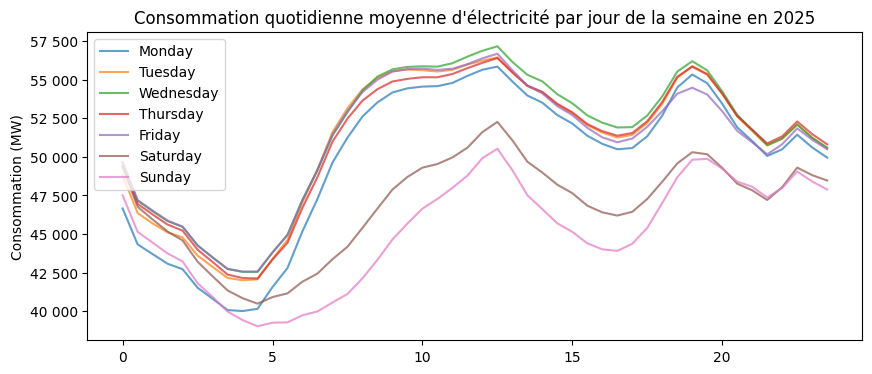

In [28]:
df_agg_ele = (
    df_ele
    .loc[df_ele['year']==2025]
    .groupby(['day_name', 'heu_float'], observed = True)
    .agg({'con_bru_ele_rte': 'mean'})
    .reset_index()
)

plt.figure(figsize=(10, 4))

sns.lineplot(
    data=df_agg_ele, 
    x='heu_float', 
    y='con_bru_ele_rte',
    alpha=0.7,
    hue='day_name')

ax = plt.gca()
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f"{int(x):,}".replace(",", " "))
)

plt.legend(loc='upper left')
plt.title('Consommation quotidienne moyenne d\'électricité par jour de la semaine en 2025')
plt.ylabel("Consommation (MW)")
plt.xlabel("")

plt.show()

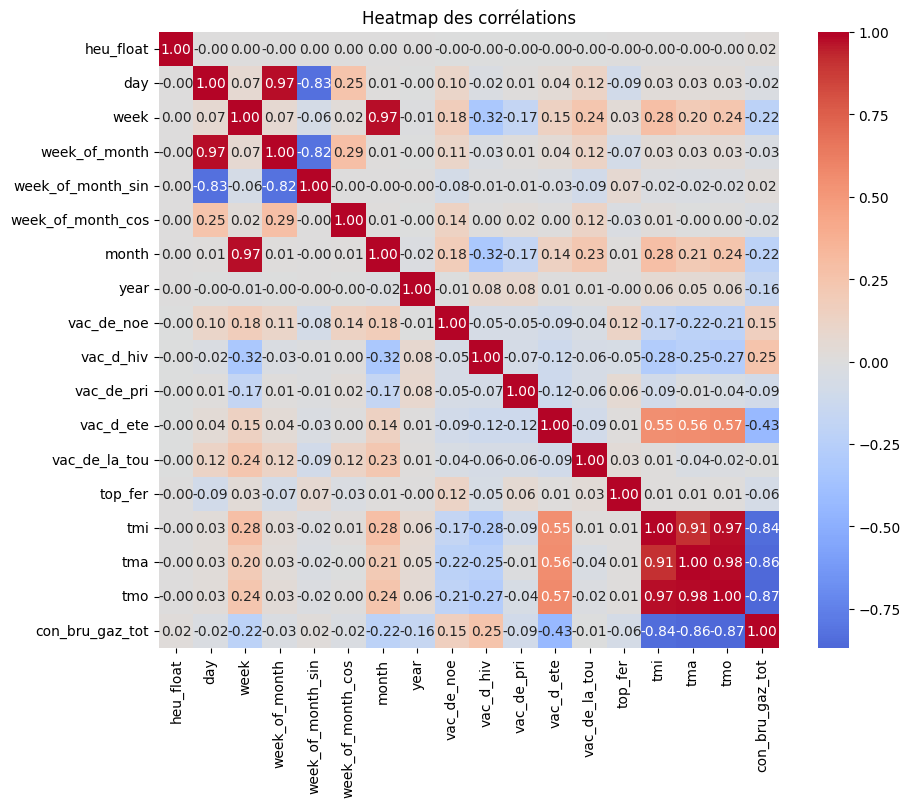

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_gaz.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0
)

plt.title("Heatmap des corrélations")
plt.show()